In [53]:
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_embeddings(filename):
    vocab = []
    embed = []
    with open(filename, 'r', encoding="utf-8") as f:
        for line in f.readlines():
            row = line.strip().split(' ')
            vocab.append(row[0])
            embed.append(row[1:])
    embed = np.asarray(embed)
    return vocab, embed

In [55]:
def plot_with_labels(low_dim_embs, labels):
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    fig = plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(
            label,
            xy=(x, y),
            xytext=(5, 2),
            textcoords='offset points',
            ha='right',
            va='bottom')
    plt.show()
    return fig

In [39]:
glove_filepath = os.path.join('datasets', 'glove.6B.50d.txt')
vocab, embed = load_embeddings(glove_filepath)

In [40]:
plot_only = 500
print(embed.shape)

(400000, 50)


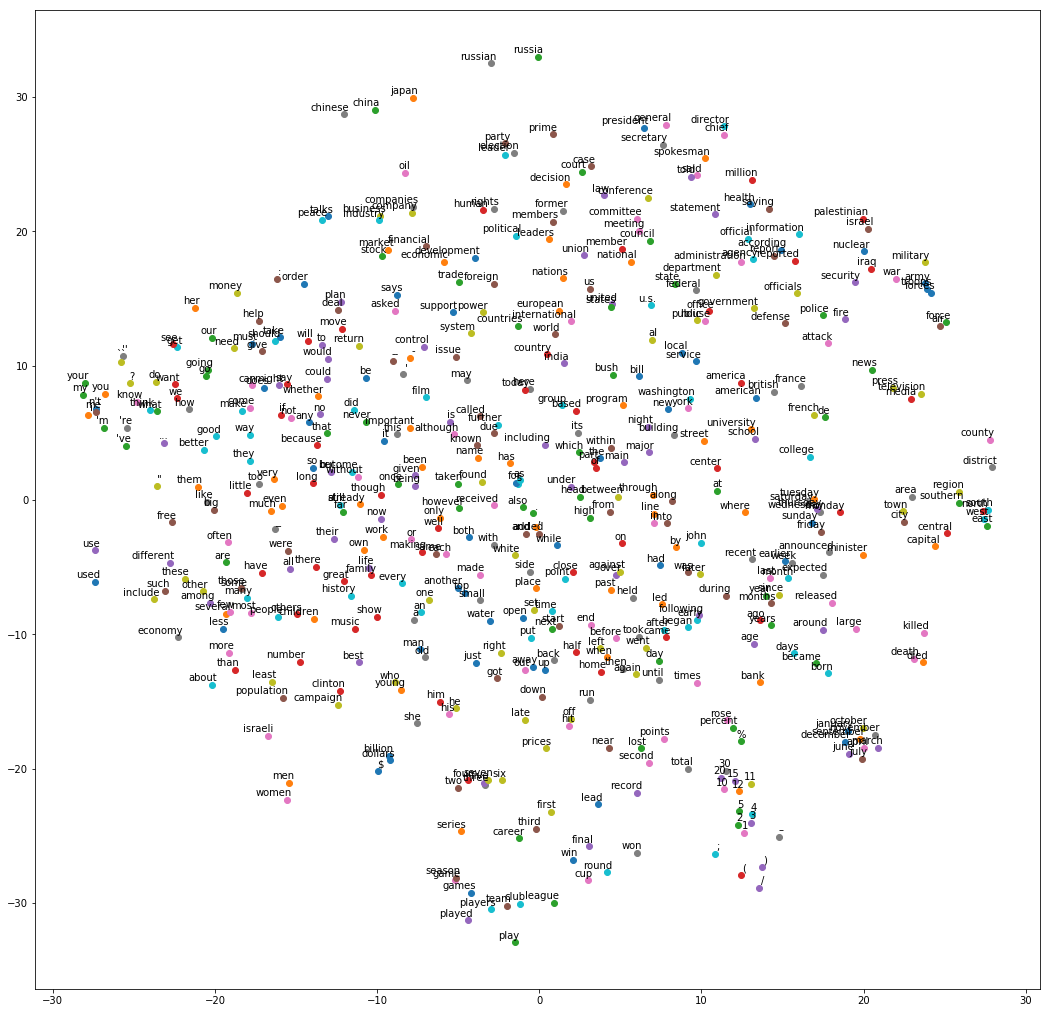

In [56]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
low_dim_embs = tsne.fit_transform(embed[:plot_only, :])
labels = [vocab[i] for i in np.arange(plot_only)]
fig = plot_with_labels(low_dim_embs, labels)

In [57]:
fig.savefig('test.png', bbox_inches='tight')